In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns
import matplotlib.transforms as mtrans
from collections import OrderedDict

In [22]:
root_dir = "/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/"
models = {'Rotation': '2023-11-29/', 'Translation': '2024-01-17/'}
embeddings = 'dHCP_embeddings'
labels=['Preterm_28', 'Preterm_32', 'Preterm_37']
target = 'train_val_values.json'
metric = 'train_val_auc'

cols = ['Prematurity Class', 'Augmentation', 'AUC']
palette={'Rotation': 'darkred',
         'Translation': 'darkgreen'}

In [131]:
dict_values = {label : {key: [] for key in models.keys()} for label in labels}

In [132]:
for key, model in models.items():
    models_dirs = os.path.join(root_dir,model)
    for label in labels:
        selected_models_dirs = [root for root, dirs, files in os.walk(models_dirs)
                                    if (target in files) & (label in root) & ('best_model' not in root)]
        print(f'{label}, {key}: {selected_models_dirs}')
        values = []
        for directory in selected_models_dirs:
            with open(os.path.join(directory,target), 'r') as f:
                perf = json.load(f)
                value = perf[metric][0]
                values.append(value)
        dict_values[label][key]=values
        

Preterm_28, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/Preterm_28']
Preterm_32, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/Preterm_32']
Preterm_37, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Outp

In [133]:
df = pd.DataFrame([[k1, k2, elem] for k1, v1 in dict_values.items() for k2, list_val in v1.items() for elem in list_val], columns=cols)

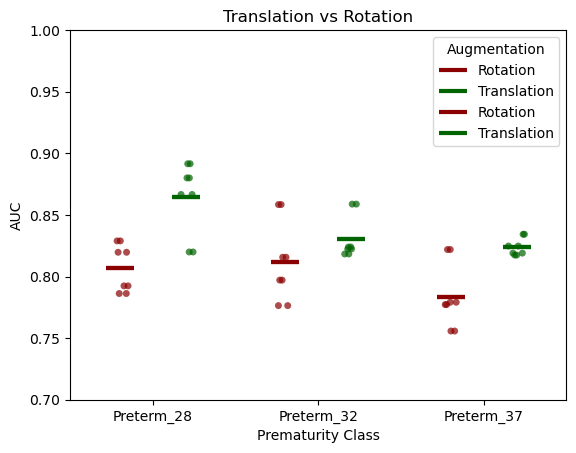

In [192]:
sns.stripplot(
data=df, x="Prematurity Class", y="AUC", hue="Augmentation",
dodge=True, alpha=.7, legend=False,
palette=palette
)
sns.pointplot(
    data=df, x="Prematurity Class", y="AUC", hue="Augmentation",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3,
    palette=palette
)
#ax.set_title(side_name)
plt.ylim(0.7, 1)
plt.title('Translation vs Rotation')
plt.show()

In [193]:
# plot AUC depending on the learning rate
# use config diff

On peut changer le répertoire dans lequel on cherche les valeurs. Mais config diff ne va pas comparer les dates différentes : il faudrait créer un comparateur de config global ? C'est un peu compliqué... Voir WandB ?

In [23]:
models = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-26/'
df_configs = pd.read_csv(models+'config_diff.csv')
df_configs.columns = ['model'] + df_configs.columns.tolist()[1:]

label='Right_PCS'
target = 'train_val_values.json'
metric = 'train_val_auc'

In [24]:
# find existing perf directories
selected_models_dirs = [root for root, dirs, files in os.walk(models)
                            if (target in files) & (label in root) & ('best_model' not in root)]
directories = []
values = []
for idx, directory in enumerate(selected_models_dirs):
    with open(os.path.join(directory,target), 'r') as f:
        perf = json.load(f)
        value = perf[metric][0]
    directories.append(directory)
    values.append(value)

In [25]:
data = {'name': directories, 'value': values}
df_values = pd.DataFrame.from_dict(data)

In [26]:
values_configs = []
mod_names = []
for row in df_configs.iterrows():
    mod_name = row[1].model
    if df_values['name'].str.contains(mod_name + '/').sum() == 1:
        row = df_values[df_values['name'].str.contains(mod_name + '/')]
        val = row.value.tolist()[0]
        values_configs.append(val)
        mod_names.append(mod_name)

In [27]:
data = {'model': mod_names, 'value': values_configs}
df_values = pd.DataFrame.from_dict(data)

In [199]:
df = pd.merge(df_configs, df_values)

In [ ]:
# convert lr to str for stripplot
df['lr']=np.array(df['lr']).astype(str)

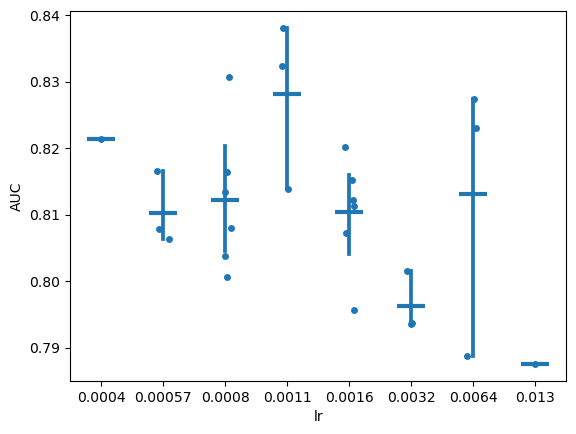

In [222]:
sns.stripplot(data=df, x='lr', y='value')
#plt.xscale('log')
sns.pointplot(
    data=df, x="lr", y="value",
    linestyle="none", errorbar=('ci', 95),
    marker="_", markersize=20, markeredgewidth=3)
plt.ylabel('AUC')
plt.show()

In [35]:
# retrieve the parameters manually when not present in config diff (parameters which were not added to parameters_to_keep...)
# trimdepth max_distance
data = {'model': ['19-06-17_0/', '16-33-55_0/', '19-06-17_1/', '16-33-55_1/', '19-06-17_2/', '16-33-55_2/', '13-09-40_156/', '16-33-55_3/', '19-06-17_3/', '16-33-55_4/', '19-06-17_4/', '16-33-55_4/'],
        'max_distance':range(0,12)}

In [36]:
models_dirs = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-31/'

In [37]:
x,y=[],[]
for model, max_dist in zip(data['model'], data['max_distance']):
    print(model, max_dist)
    x.append(max_dist)
    with open(models_dirs+model+'ACC_embeddings/Right_PCS/train_val_values.json', 'r') as f:
        auc = json.load(f)
    auc = auc['train_val_auc'][0]
    y.append(auc)

19-06-17_0/ 0
16-33-55_0/ 1
19-06-17_1/ 2
16-33-55_1/ 3
19-06-17_2/ 4
16-33-55_2/ 5
13-09-40_156/ 6
16-33-55_3/ 7
19-06-17_3/ 8
16-33-55_4/ 9
19-06-17_4/ 10
16-33-55_4/ 11


In [38]:
x.append(-1)
with open('/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-02-01/11-59-39_147/ACC_embeddings/Right_PCS/train_val_values.json', 'r') as f:
    auc = json.load(f)
    auc = auc['train_val_auc'][0]
    y.append(auc)

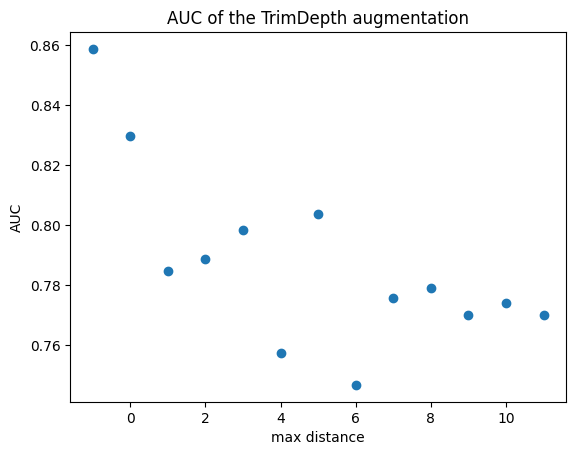

In [40]:
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('max distance')
ax.set_ylabel('AUC')
ax.set_title('AUC of the TrimDepth augmentation')
plt.show()

In [91]:
models_dirs = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/test_configs/'
target='train_val_values.json'
labels, colors, metric = ['Right_PCS','Age_64', 'Age', 'Sex'],\
                         ['royalblue', 'darkorange', 'darkred', 'darkgreen'],\
                          'train_val_auc'
#labels, colors, metric = ['Right_PCS','Age_64', 'Sex'],\
#                         ['royalblue', 'darkorange', 'darkgreen'],\
#                          'train_val_total_balanced_accuracy'
embeddings = ['ACC_0','UKB_5percent','UKB_5percent', 'UKB_5percent']
# SVC regularization
#labels, colors, metric = ['Right_PCS', 'Right_PCS', 'Right_PCS', 'Right_PCS'],\
#                         ['royalblue', 'darkred', 'darkgreen', 'darkorange'] ,\
#                         'train_val_auc'
#embeddings = ['ACC_1_C0001', 'ACC_1_001', 'ACC_1_C01', 'ACC_1_C1']
#model_name = 'translation'
model_name = ''
df_list=[]
for label, embedding in zip(labels, embeddings):
    dict_values={}
    selected_models_dirs = [root for root, dirs, files in os.walk(models_dirs, followlinks=True)
                                if (target in files) & (root.endswith(label)) & (embedding+'_embeddings' in root) & (model_name in root) & ('best_model' not in root)]
    lb = embedding+'_'+label
    print(f'{lb}: {selected_models_dirs}')
    dict_values = {'model': [], lb: []}
    for directory in selected_models_dirs:
        with open(os.path.join(directory,target), 'r') as f:
            perf = json.load(f)
            if isinstance(perf[metric], float):
                value = perf[metric]
            else:
                value = perf[metric][0]
            name = directory.replace(models_dirs, '').split('/')[0]
            dict_values['model'].append(name)
            dict_values[lb].append(value)
    df = pd.DataFrame.from_dict(dict_values)
    df_list.append(df)

ACC_0_Right_PCS: ['/volatile/jl277509/Runs/02_STS_babies/Program/Output/test_configs/foldlabel_no_keep_30_2/ACC_0_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/test_configs/cutout_keep_bottom_0/ACC_0_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/test_configs/random_all_keep_bottom_7/ACC_0_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/test_configs/random_all_keep_bottom_8/ACC_0_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/test_configs/cutout_keep_bottom_2/ACC_0_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/test_configs/random_all_no_keep_0/ACC_0_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/test_configs/random_all_keep_bottom_1/ACC_0_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/test_configs/random_all_keep_bottom_6/ACC_0_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_

In [92]:
df=pd.concat(df_list,axis=1).T.drop_duplicates().T
df=df.sort_values(by='model').reset_index(drop=True)
l=df['model'].tolist()
df['model']=['_'.join(elem.split('_')[0:-1]) for elem in l]

In [93]:
if 'UKB_5percent_Age_64' in df.keys():
    df['balanced_Age_64'] = (df[f'{embeddings[0]}_Right_PCS'].to_numpy()+ np.minimum(np.ones(len(df['UKB_5percent_Age_64']))-df['UKB_5percent_Age_64'].to_numpy(),0.5)) / 2
    labels.append('balanced_Age_64')
    colors.append('goldenrod')
if 'UKB_5percent_Age' in df.keys():
    df['balanced_Age'] = (df[f'{embeddings[0]}_Right_PCS'].to_numpy()+ np.minimum(np.ones(len(df['UKB_5percent_Age']))-df['UKB_5percent_Age'].to_numpy(),0.5)) / 2
    labels.append('balanced_Age')
    colors.append('red')
#df['balanced2'] = [(np.mean(df.loc[df['model']==model]['Right_PCS'].to_numpy())
#                   +np.mean(np.minimum(np.ones(len(df.loc[df['model']==model]))-df.loc[df['model']==model]['Age_64'].to_numpy(),0.5))
#                   -np.std(df.loc[df['model']==model]['Right_PCS'].to_numpy())
#                   -np.std(df.loc[df['model']==model]['Age_64'].to_numpy())
#)/2 for model in df['model'].tolist()]

plt.close()
fig, ax = plt.subplots(figsize=(15,10))
for idx, label in enumerate(labels):
    sns.violinplot(data=df, x='model', y=label, label=label, inner='point')
    sns.despine(offset=0, trim=False, ax=ax)
    #sns.stripplot(data=df, x='model', y=label, marker='v',ax=ax)
    #sns.pointplot(
    #    data=df, x="model", y=label,
    #    linestyles="", errorbar=None,
    #    marker="s", markersize=10, markeredgewidth=2,ax=ax,label=label,scale=1.2)
    plt.ylabel('AUC')
    #plt.xticks(rotation=15)
    offset = mtrans.ScaledTranslation(0.3*idx, 0, ax.figure.dpi_scale_trans)
    nb_coll = len(ax.collections)
    start_offset_idx, end_offset_idx = idx*nb_coll // len(labels), (idx+1)*nb_coll // len(labels)
    for k in range(start_offset_idx, end_offset_idx): #don't really understand the collection organization
        #first offset the points
        trans = ax.collections[k].get_transform()
        ax.collections[k].set_transform(trans + offset)
    #offset the errorbars
    offset = mtrans.ScaledTranslation(0.3*idx, 0, ax.figure.dpi_scale_trans)
    nb_lines = len(ax.lines)
    start_offset_idx, end_offset_idx = idx*nb_lines // len(labels), (idx+1)*nb_lines // len(labels)
    for k in range(start_offset_idx, end_offset_idx):
        trans = ax.lines[k].get_transform()
        ax.lines[k].set_transform(trans + offset)
#handles, labels = plt.gca().get_legend_handles_labels()
#by_label = OrderedDict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
#plt.legend()
plt.ylim(0.45,1)
plt.show()

/tmp/ipykernel_2463560/3041726558.py:9: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
/tmp/ipykernel_2463560/3041726558.py:9: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
/tmp/ipykernel_2463560/3041726558.py:9: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
/tmp/ipykernel_2463560/3041726558.py:9: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Li

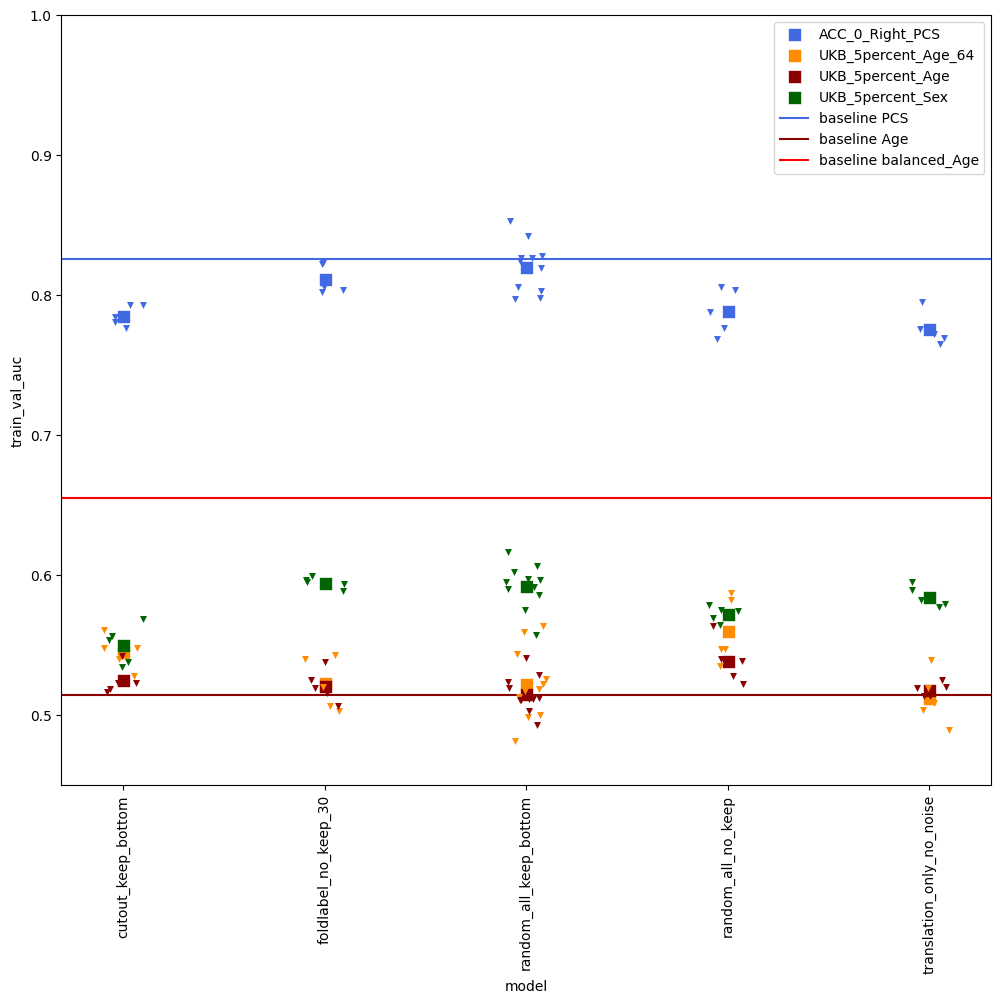

In [94]:
plt.close()
off=0
fig, ax = plt.subplots(figsize=(12,10))
for idx, (label, color, embedding) in enumerate(zip(labels, colors, embeddings)):
    #sns.violinplot(data=df, x='model', y=label, label=label, inner='point')
    #sns.despine(offset=0, trim=False, ax=ax)
    lb = embedding+'_'+label
    sns.stripplot(data=df, x='model', y=lb, marker='v',ax=ax, color=color)
    sns.pointplot(
        data=df, x="model", y=lb,
        linestyles="", errorbar=None,
        marker="s", markersize=10, markeredgewidth=2,ax=ax,label=lb,scale=1.2, color=color)
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    offset = mtrans.ScaledTranslation(off*idx, 0, ax.figure.dpi_scale_trans)
    nb_coll = len(ax.collections)
    start_offset_idx, end_offset_idx = idx*nb_coll // len(labels), (idx+1)*nb_coll // len(labels)
    for k in range(start_offset_idx, end_offset_idx): #don't really understand the collection organization
        #first offset the points
        trans = ax.collections[k].get_transform()
        ax.collections[k].set_transform(trans + offset)
    #offset the errorbars
    offset = mtrans.ScaledTranslation(off*idx, 0, ax.figure.dpi_scale_trans)
    nb_lines = len(ax.lines)
    start_offset_idx, end_offset_idx = idx*nb_lines // len(labels), (idx+1)*nb_lines // len(labels)
    for k in range(start_offset_idx, end_offset_idx):
        trans = ax.lines[k].get_transform()
        ax.lines[k].set_transform(trans + offset)
plt.ylim(0.45,1)
if metric == 'train_val_auc':
    plt.axline((0, 0.8257), (1, 0.8257), c='royalblue', label='baseline PCS')
    plt.axline((0, 0.5147), (1, 0.5147), c='darkred', label='baseline Age')
    plt.axline((0, 0.6555), (1, 0.6555), c='red', label='baseline balanced_Age')
elif metric == 'train_val_total_balanced_accuracy':
    plt.axline((0, 0.7453), (1, 0.7453), c='royalblue', label='baseline PCS')
    plt.axline((0, 0.5082), (1, 0.5082), c='darkorange', label='baseline Age_64')
    plt.axline((0, 0.6185), (1, 0.6185), c='goldenrod', label='baseline balanced_Age_64')
plt.legend()
plt.show()

In [12]:
# visu when model root names are identical
# for one folder
# take all models
# gather by roots
# plot all perfs by metric: PCS, age, Sex (use stripplot etc...)
# simply label with model names...

In [147]:
df_configs = pd.read_csv(models_dirs+'config_diff.csv')
df_configs.columns = ['model'] + df_configs.columns.tolist()[1:]

FileNotFoundError: [Errno 2] No such file or directory: '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel/config_diff.csv'

In [11]:
#mods = df_configs.loc[df_configs['percentage']==30]['model']
#mods = df_configs.loc[df_configs['patch_size']=='[1, 11, 25, 25]']['model']
mods = df['model'].tolist()
val_list=[]
for model in mods:
    val = df.loc[df['model'].str.contains(model)][label].tolist()[0]
    val_list.append(val)
print(val_list)
print(np.mean(val_list))
print(np.std(val_list))

[0.556401134911602, 0.5689784869089667, 0.5336122711966714, 0.5650442056285407, 0.5698204011745022, 0.5426680184707184, 0.5444272245550479, 0.5397538894684608]
0.5525882040393139
0.013346805487133257
